# Welcome to the Machine learning for IDE students application!

This is a JupyterNotebook created for IDE students to get introduced to using machine learning for prototype analysis. It might seem like a lot if you don't have a lot of coding experience, but just follow the steps, read the instructions and it should be a breeze! 


## Setting up

This application will take you through the preprocessing, training, testing and evaluating steps of the machine learning process. Make sure you've read through the [User Guide](https://datacentricdesign.github.io/iot-ml-design-kit/) before you continue.


### Try the program

We have sequenced this Notebook in such a way that everything is set up with an example dataset. Feel free to go through te application one time, before changing in to your own data / preferences. This way you can get a feeling of how the product works and what is needed for a good running program. 

### Cells

Cells are the buidling blocks of this notebook. You have cells with code and cells with text. This is a text cell and the ones that look different are code cells. You can run code cells by just clicking inside the cell and press run at the left side of the cell. The cell is running when you see [*] at the left side of the cell and the cell is done running when you see a number at the side (eg. [1]).

### Kernel

The kernel is like the engine of the application, this runs all the python code. Sometimes the kernel crashes. Most of the times this happens because of a bug. When the kernel has crashed, you need to restart it under the kernel tab in the notebook. When you restart the kernel you need to run most cells again depending on where you were in the process. Sometimes you do not need to do the preprocessing and labeling again, depending if you have already finished this. All cells that you have not ran before the kernel crashed, do not need to be rerun!

**Cells to run when the kernel crashes:** 2,3,4,7

**Cells you do not have to rerun:** 1


### The different steps in the process

In the flowchart below, all the steps in the notebook are shown in chronological order. The arrow shows you where you are in the notebook. Below the flow chart you see the names of the code cells that are part of the respective steps. Read the flowchart to have a better understanding of what you are about to do.

<img src="Plots\flowcharts\Capstone AI visuals (6).jpg" alt="Flowchart" height="300"/> 

### Setting up the packages

To be able to run the code, you need to import packages. Packages are python files with functions and objects in it, this will help us to run the program and keep the code in this program clean. Code cell 1 features standard python packages, these are available to everyone and can be found online. Code cell 2 loads a set of custom packages, that are developed to make machine learning easily approachable.

As is said before, to run a cell click inside the cell and press the 'play' button on the left side.
You can consult [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) if you experience difficulty using Anaconda.

ATTENTION: The installing of packages is quite a large operation. Keep in mind that this can take a few minutes. It is very important to run the code completely, so only continue when the cell is done running as explained.

If you have any problems, remove the first line containing `%%capture` and run the cell again. This will show you the output of the cell and thus more information about the error.

In [ ]:
# 1

# using %%capture to hide the output of the cell, because this might be confusing
%%capture 

# installing all the online packages that are needed for the program.
!pip3 install numpy==1.21.4
!pip3 install pandas==1.5.2
!pip3 install matplotlib==3.6.3
!pip3 install scikit-learn==1.2.0
!pip3 install plotly==5.12.0
!pip3 install IPython==8.8.0
!pip3 install kaleido==0.2.1

These are customly designed packages for this application, when you run the cell, you import them.

In [1]:
# 2

#Importing all the local packages that have been made for this application.
from AI_for_Designers.data_processing import Preprocessing, empty_files
from AI_for_Designers.active_learning import ActiveLearning
from AI_for_Designers.novelty_detection import NoveltyDetection
from AI_for_Designers.data_stats import Stats
from AI_for_Designers.Notebook import check_product_name, amount_of_samples

In the cell below, the name of the Product you are analysing can be changed. It helps to come up with a descriptive name like the name of the prototype. You can enter the name after `Product = `  
ATTENTION: the name should only contain letters, numbers, underscores and dashes.

In [2]:
# 3

# Naming the product that is analysed eg. 'Vacuum_cleaner' 'chair' 'tablet'
Product = 'Mok'
check_product_name(Product)

Name is valid!


<img src="Plots\flowcharts\Capstone AI visuals (7).jpg" alt="Flowchart2" height="350"/> 

## Pre-processing
Pre-processing is needed to create understandable information for the computer. Raw telemetry data is difficult to understand for the computer, therefore we conduct pre-processing. During preprocessing, the raw data gets divided into frames. Frames are a collection of consecutive data points. This makes for more certain predictions and a faster model because it knows more about a frame and there are fewer datapoints. Also during this phase the features are extracted from the frames. (consult user guide if you do not know what features are)

This is what a preprocessing object, here you enter all the information that the object need and that way we can start making the frames and extract the features. We will show you how this looks and then we will tell you what it all does.

```python 
pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', # Here you can enter your accelerometer file.
                          r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'  # Here you can enter your gyroscope file. 
              ], 
              video_file=r'Data/data-mok/GL010035_LRV.mp4', # Here you can enter the video corresponding to the datafiles.
              start_offset = 0, # Here you can enter the start offset for this file.
              stop_offset = 0, # Here you can enter the stop offset for this file.
              skip_n_lines_at_start = 0, # Here you can enter the number of lines you want to skip at the start of the data files
              video_offset = 0, # Here you can enter the video offset for this file
              size = frame_size, # This is the frame size, do not edit here.
              offset = frame_offset) # This is the frame offset, do not edit here.
            
```

There are **3 files** that you need to insert into the preprocessing object:

- accelerometer file: This is the file with the accelerometer data that you gathered, this needs needs to be in a specific format described in the user guide. Notice that there is an 'r' in front of the adress of the file, this is needed to read the path correctly, do not remove it!

- Gyroscope file: This is the file with the gyroscope data that you gathered, this needs needs to be in a specific format described in the user guide. Notice that there is an 'r' in front of the adress of the file, this is needed to read the path correctly, do not remove it!

- `video_file`: This is the video you took of the actions perfomed with the product. 

Note: It is also possible to only use an accelerometer file or gyroscope file. For this to work, you need to remove the file you do not want to have in the analysis, this looks like this:

```python
pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv'],
              video_file=r'Data/data-mok/GL010035_LRV.mp4',
              ......

             )

```

These files form the basis of the preprocessing, please pay attention to this step and make sure there is no fault.

There are **6 variables** that are important for you to edit:

 - `frame_size`: This sets the frame size for all of the preprocessing objects. Make this larger for slow movements (like 5 seconds for biking), smaller for very quick movements (like 1 second for vacuum cleaning). A frame size of about the length of one action is advised. Default = 2 sec
 - `frame_offset`: This sets the frame ofset for all of the preprocessing objects. crease if you set a bigger frame size. A frame offset of around 10-20% of the frame size is advised. A lower frame offset will turn the same dataset into more datapoints so it might result in a more accurate model but will result in more work for you. Default = 0.2 sec
 - `start_offset`: This deletes the start data if not needed. Set it to the time it takes in seconds between starting the recording and starting with the actual Product usage. Default = 0
 - `stop_offset`: The same as the start_offset, but for the end of a recording. Default = 0
 - `skip_n_lines_at_start`: Set this to the number of lines you want to skip at the start of the file. This is useful if you have a lot of data that is not relevant to the actual Product usage.  or if the first lines of the data contain garbageDefault = 0. For more information about fileformatting, consult the user guide.
 - `video_offset`: Set this to the time in seconds that the video is ofrecording, but the telemetry is not yet recordingThis is usefull when the video and data are not synchronized. Default = 0.0

Please enter the `frame_size` and the `frame_offset` below, you enter them here, because when you have multiple preprocessing objects, these two need to be the same in the objects, while the others can vary beetween (data) recordings. 

In [4]:
# 4

# Setting the frame size and frame offset
frame_size = 0.7
frame_offset = 0.1

Enter the desired values below, and run the cell to start the preprocessing. 

After you've preprocessed your data, the application will have extracted features like standard deviation and most present frequency. These features will be used to analyze the characteristics of a frame and classify it to the action, this will happen in the next step.

Note: You will find lines like: `f'Preprocessed-data/{Product}/features_{Product}.txt',` more often, the f is correct and stands for an f-string, this is a string that contains variables.

In [7]:
# 5

# making the data files for the storage of the features, no need to change anything here.
empty_files([f'Preprocessed-data/{Product}/features_{Product}.txt',
             f'Preprocessed-data/{Product}/features_{Product}_scaled.csv',
             f'Preprocessed-data/{Product}/processed_data_files.txt'])

# Make a preprocessing object that corresponds with the product
pre = Preprocessing(Product)

# Insert the data into the preprocessing object.

pre.windowing(input_file=[r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', # Here you can enter your accelerometer file, only change what is in the brackets.
                          r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'  # Here you can enter your gyroscope file, only change what is in the brackets.
              ], 
              video_file=r'Data/data-mok/GL010035_LRV.mp4', # Here you can enter the video corresponding to the datafiles.
              start_offset = 0, # Here you can enter the start offset for this file.
              stop_offset = 0, # Here you can enter the stop offset for this file.
              skip_n_lines_at_start = 0, # Here you can enter the number of lines you want to skip at the start of the data files
              video_offset = 0, # Here you can enter the video offset for this file
              size = frame_size, # This is the frame size, do not edit here.
              offset = frame_offset) # This is the frame offset, do not edit here.

# Below you find an eample of extra datafile with video , you can uncomment this if needed or copy it.
# When you have multiple datarecordings you can add more data to the preprocessing object. 
# You can use the example code below and use it as amany times as you have datarecordings.

'''
pre.windowing(input_file=[
              r'Data/data-mok/Gijs_Mok_GH010035-ACCL.csv', # Here you can enter your accelerometer file.
              r'Data/data-mok/Gijs_Mok_GH010035-GYRO.csv'  # Here you can enter your gyroscope file. 
              ], 
              video_file='Data/data-mok/GL010035_LRV.mp4', # Here you can enter the video corresponding to the datafiles.
              start_offset = 0, # Here you can enter the start offset for this file.
              stop_offset = 0, # Here you can enter the stop offset for this file.
              skip_n_lines_at_start = 0, # Here you can enter the number of lines you want to skip at the start of the data files
              video_offset = 0, # Here you can enter the video offset for this file
              size = frame_size, # This is the frame size, do not edit here.
              offset = frame_offset) # This is the frame offset, do not edit here.
              
'''




# Initiate the scaler on the preprocessing object, in order to get scaled features. No need to change anything here.
pre.SuperStandardScaler(fr'Preprocessed-data\{Product}\features_{Product}.txt') 

Amount of sensors: 6, amount of features per sensor: 8


In [4]:
# 6

# This code shows you the amount of datapoints you have for the active learning, no need to change anything here.
print(amount_of_samples(f'Preprocessed-data/{Product}/processed_data_files.txt'))

1891


<img src="Plots\flowcharts\Capstone AI visuals (8).jpg" alt="Flowchart3" height="350"/> 

## Active learning (training) and labeling

Congratulations, you finished the preprocessing step! The next step will be to train the model to get you get closer to the analysis of your product. In this step, you will train the model: It will show you a couple of frames of the video and you will tell the model what is happening within these frames. The model will train itself with the accelerometer and gyroscope data that is synchronised with the video file. So by entering the labels in the training step, the model wil become smarter, because you tell the model what is happening at what point in the data.


This will be done with active learning. This means that the model will tell you the datapoint that the model is least certain about. This way the model only asks you for the most 'confusing' datapoint so that it gets more certain about the prediction each time, it learns in an iterative way. Active learning greatly reduces the time to train the model as it only needs to know the points that it is the least certain about: You do not have to label all the data.

First, enter the activities that you think will be in the video. Don't worry about adding too many or too little, you can always add more labels later during training, however if you restart training, these newly added labels will be lost. You can enter a new label by following the instructions and messages during training

An example:
```python 
   labels = ['Still', 'Pick_up', 'Put_down', 'Drinking', 'Walking']
   # You can change the text in the single quotation marks ('') or add another.
   # Make sure that every label is in quotation marks and that there is a comma in between them.
   ```


Furthermore you will need to enter how many active learning iterations you want to do. You need to go trough the entire labelling process at least once to upload your model.

First the model will create a base model, this needs you to label approximately 5.5 times the amount of labels that you have defined, so for 4 label you need to enter 22 labels for the basemodel. The `active_learning_iterations` will be added on top of the base model, so in this example if you set it to 20, you will need to label 42 (22 + 20). The more you set the active learning iterations, the better the model, but the time it will take will be longer. Labeling around 10-20% of the total amount of samples or at least 100 samples is advised for a good model. The cell above can be used to find the amount of available samples.

In [5]:
# 7

# Here you can put the labels of the activities that you think are goin to be in the video. You can always add new ones later. later.
labels = ['Still', 'Pick_up', 'Put_down', 'Drinking', 'Walking']

# this is the ammount of iterations that it will use for the active learning, see text for more context
active_learning_iterations = 100


### Labeling

Next up is training the model. After entering your labels, run code cell 7 and 8 and you will be shown a part of your own recorded video and asked to label the activity you see. Take your time to label the data correctly, as the results fully rely on accurate labels. You get the option to delete a data point if you are not completely sure about the label (by pressing "x" in the text box) e.g. the sample contains two different actions or if it's a faulty sample. If you incorrectly labeled the previous sample, you can delete it using 'd'.

First, the model will create a base model, which is part of active learning. You will notice when the base model is done when a graph appears next to the video. Here, an image with the labeled frames will show, this is so you can see the data in perspective, the image shown is a PCA analysis. Additionally, the model will have its first version finished, so the probabilities of the class according to the model are shown. These probabilities should get better while progressing in the training process. When the initial phase has ended and you are onto active learning, it will also show you the progress of how many points you have labelled at the top.

131.7999999999968


Enter the index or the name of one of the following labels. Enter 'n' to add a new label, 'x' to discard this sample, and 'd' to delete the previously labeled  sample:
1. Still        0.23
2. Pick_up      0.14
3. Put_down     0.2
4. Drinking     0.23
5. Walking      0.2


KeyboardInterrupt: Interrupted by user

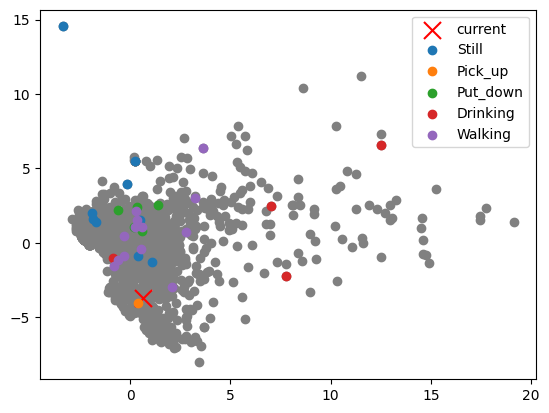

In [6]:
# 8

# This is the active learning cell.
# No need for any modification here, just run it.
AL = ActiveLearning(fr'Preprocessed-data/{Product}/features_{Product}_scaled.csv', Product, labels, frame_size)
labels = AL.training(active_learning_iterations)
AL.write_to_file()

<img src="Plots\flowcharts\Capstone AI visuals (9).jpg" alt="Flowchart4" height="350" margin_left="500"/> 

### Testing

Congratulations! You have trained and saved your model. In order to get an idea of how accurate the model is, it is advised to label some more data. These frames are not used in training the model, but the model is used to predict the action that is happening in this frame. By telling the model which action actually is happening in the frame, the accuracy can be measured, by calculating the error rate (dividing the wrong labelled frames by the total amount of frames). 

It is advised to label at least 20 frames, but preferably more (approximately 50). The more frames that are labelled, the better the indication of the accuracy is. 0.3 would mean that 30% of the samples were incorrectly labelled by the model, so the accuracy is 70%. You want the value that this function puts out to be as low as possible.
You can enter the amount of testing frames in `frames_to_test = `. This value maximizes at 20% of the amount of datapoints.

In [ ]:
# 9

# start the testing and enter how many tests you want to run in the brack1ets.
frames_to_test = 20 # Enter how many frames to test here.
AL.testing(frames_to_test)

### Novelty Detection

To further investigate your model, you can run the cell below. This will show you the 10% of all frames that stand out the most. These are the frames that are furthest from their respective cluster centres. This can be used by you to see if there are any frames in which something strange is happening during the user test that you might need to adapt your design for. 

In [ ]:
#10

# No need to change anything here.
# Detect the noveties
ND = NoveltyDetection(fr'Preprocessed-data/{Product}/features_{Product}_scaled_AL_predictionss.csv', fr'Preprocessed-data/{Product}/processed_data_files.txt')
novelties = ND.detect(0.1)

# Display the novelties
ND.play_novelties(novelties, frame_size)

<img src="Plots\flowcharts\Capstone AI visuals (10).jpg" alt="Flowchart5" height="350" margin_left="500"/> 

### Information about your data - Product usage timeline

To get more information about your data, please run the cell below to see some simple stats and two timelines. These timelines shows what the model predicts at every point in the video.
This can be used to get a better understanding of how the product is used and in what sequence people perform the actions.

Percentages per label:
 Still: 0.11698612029081296
 Pick_up: 0.6074025115664243
 Put_down: 0.19101123595505617
 Drinking: 0.03502974223397224
 Walking: 0.0495703899537343


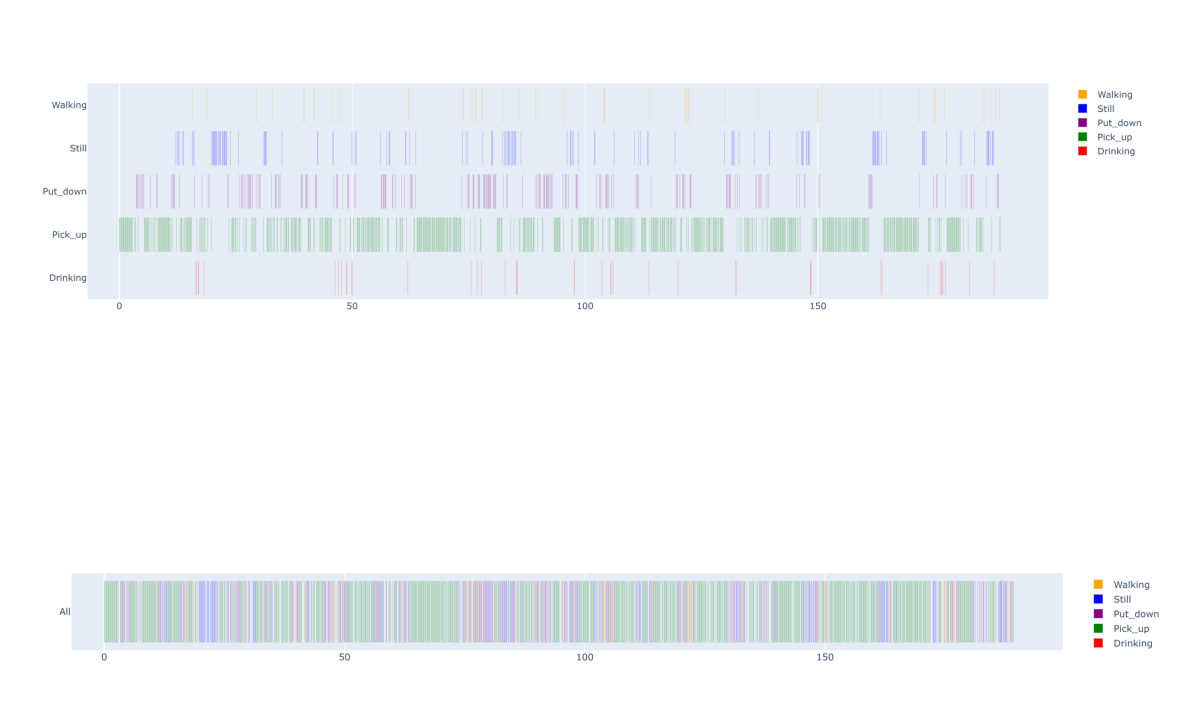

In [6]:
# 11

# Print and generate some statistics about the product usage for analysis.
stats = Stats(fr'Preprocessed-data/{Product}/features_{Product}_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)

<img src="Plots\flowcharts\Capstone AI visuals (11).jpg" alt="Flowchart6" height="350" margin_left="500"/> 

## New Data

In the section beneath we will quickly run through some of the same steps as above, but now we can feed the model that we created with new, unseen data. This is data that the model has not seen before. The model created in the steps above will be used to predict the actions happening in this unseen data. This can be helpful for testing the robustness of your model when data was gathered by different people. 

Moreover, this is the step where you can enter data that has not been gathered in a controlled environment, in other words real life data. This can help you analyse real product usage without you having to label it again.

Now you can feed the trained model more data by changing the 'pre_new.windowing' function!!

In [ ]:
# 12

# Import some standard python packages
import numpy as np
import pandas as pd
import pickle

# Create and empty the datafiles for the new data. No need to edit this.
empty_files([f'Preprocessed-data/{Product}_new/features_{Product}_new.txt',
             f'Preprocessed-data/{Product}_new/features_{Product}_new_scaled.csv',
             f'Preprocessed-data/{Product}_new/processed_data_files.txt'])

# Load the trained model that you made above using pickle
model = pickle.load(open(fr'Models/model_{Product}_{active_learning_iterations}.pickle', 'rb'))

# Preprocess the new data
pre_new = Preprocessing(f'{Product}_new')
pre_new.windowing(input_file=[r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-ACCL.csv', # Here you can enter your accelerometer file, only change what is in the brackets.
                              r'GoPro\Gijs_Mok\Gijs_Mok_GH010035-GYRO.csv' # Here you can enter your gyroscope file, only change what is in the brackets.
                  ], 
                  video_file = r'GoPro\Gijs_Mok\GL010035_LRV.mp4', # Here you can enter the video corresponding to the datafiles.
                  start_offset = 0, # Here you can enter the start offset for this file.
                  stop_offset = 0, # Here you can enter the stop offset for this file.
                  skip_n_lines_at_start = 0, # Here you can enter the number of lines you want to skip at the start of the data files
                  video_offset = 0, # Here you can enter the video offset for this file
                  size = frame_size, # This is the frame size, do not edit here.
                  offset = frame_offset) # This is the frame offset, do not edit here.

# Predict the label of all samples based on the trained model.
new_dataset = pd.read_csv(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled.csv', delimiter=',')
predictions = model.predict(np.array(new_dataset.iloc[:, 3:]))

# Replace the labels and write them to a new AL prediction file.
new_dataset['label'] = predictions
new_dataset.to_csv(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', index=False)

# Novelty detection for the new set.
ND2 = NoveltyDetection(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', fr'Preprocessed-data/{Product}_new/processed_data_files.txt')
novelties = ND2.detect(0.1)
ND2.play_novelties(novelties, frame_size)

# Use the new file to retrieve the predicted timeline.
stats = Stats(fr'Preprocessed-data/{Product}_new/features_{Product}_new_scaled_AL_predictionss.csv', labels)
stats.print_percentages()
stats.show_ghan_chart(frame_offset)

### End

This is the end of the notebook, thank you for using it, we hope it helped.